#Este conjunto de datos se puede utilizar para construir un modelo CNN que pueda clasificar si un zapato es de marca Adidas o Nike.

In [83]:
import os, shutil, pathlib
from tensorflow import keras
from tensorflow.keras import layers
# lee las imágenes, decodifica las imágenes,
# convierte en tensores, cambia el tamaño de las imágenes, las empaca en lotes
from tensorflow.keras.utils import image_dataset_from_directory # similar a la de NLP
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16 # modelo preentrenado
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from keras.layers import Activation, MaxPool2D, BatchNormalization, Dropout
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import optimizers
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [72]:
import pathlib

direccion_original = pathlib.Path('C:\\Users\\yadko\\Downloads\\bootcam AI\\data\\adidas_nike')



In [73]:
# Crea objetos de tipo tf.data.Dataset
# text_dataset_from_directory: NLP
train_dataset = image_dataset_from_directory(
    direccion_original / "train",
    image_size = (224, 224),
    batch_size = 32
)
validation_dataset = image_dataset_from_directory(
    direccion_original / "validation",
    image_size = (224, 224),
    batch_size = 32
)
test_dataset = image_dataset_from_directory(
    direccion_original / "test",
    image_size = (224, 224),
    batch_size = 32
)

Found 460 files belonging to 2 classes.
Found 60 files belonging to 2 classes.
Found 60 files belonging to 2 classes.


In [113]:
train_dataset.class_names

['adidas', 'nike']

In [74]:
lenet_5= Sequential()

# C1 Capa Convolucional
lenet_5.add(Conv2D(filters= 6,kernel_size = 5,strides = 1, activation = 'tanh',
                 input_shape = (224, 224, 3), padding = 'same'))

# S2 Capa de pooling
lenet_5.add(AveragePooling2D(pool_size=2, strides=2, padding = 'valid'))

# C3 Capa Convolucional
lenet_5.add(Conv2D(filters = 16, kernel_size = 5, strides = 1,activation = 'tanh',
                 padding = 'valid'))

# S4 Capa de pooling
lenet_5.add(AveragePooling2D(pool_size = 2, strides=2, padding = 'valid'))

# C5 Capa Convolucional
lenet_5.add(Conv2D(filters = 120, kernel_size = 5, strides = 1, activation = 'tanh',
                  padding = 'valid'))

lenet_5.add(Flatten())

# FC6 Capa densa
lenet_5.add(Dense(units = 84, activation = 'tanh'))

#FC7 Capa densa
lenet_5.add(Dense(units = 1, activation = 'sigmoid')) #siempre para problemas de clasificacion

lenet_5.summary()

c:\Users\yadko\Downloads\bootcam AI\p1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_2             │ (None, 112, 112, 6)    │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 108, 108, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_3             │ (None, 54, 54, 16)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 50, 50, 120)    │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 300000)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 84)             │    25,200,084 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,251,161 (96.33 MB)

 Trainable params: 25,251,161 (96.33 MB)

 Non-trainable params: 0 (0.00 B)

In [75]:
lenet_5.compile(loss="binary_crossentropy",
               optimizer="rmsprop",
               metrics=["accuracy"])


In [76]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "cnn_clasificacion_tennis_adidas_nike_lenet_5.keras",
        save_best_only = True,
        monitor = "val_loss"
    ),
    
]

In [77]:
import os


# Obtén la lista de archivos en el directorio
archivos = os.listdir(direccion_original/"train/adidas")

# Filtra solo los archivos (excluyendo directorios)
archivos = [f for f in archivos if os.path.isfile(os.path.join(direccion_original/"train/adidas", f))]

# Muestra los nombres de los archivos
print(archivos)


['aadidas_ (22).jpg', 'aadidas_ (23).jpg', 'aadidas_ (24).jpg', 'Adidas (1).jpg', 'Adidas (10).jpg', 'Adidas (11).jpg', 'Adidas (12).jpg', 'Adidas (13).jpg', 'Adidas (14).jpg', 'Adidas (15).jpg', 'Adidas (16).jpg', 'Adidas (17).jpg', 'Adidas (2).jpg', 'Adidas (28).jpg', 'Adidas (29).jpg', 'Adidas (3).jpg', 'Adidas (30).jpg', 'Adidas (31).jpg', 'Adidas (32).jpg', 'Adidas (33).jpg', 'Adidas (34).jpg', 'Adidas (35).jpg', 'Adidas (36).jpg', 'Adidas (37).jpg', 'Adidas (38).jpg', 'Adidas (39).jpg', 'Adidas (4).jpg', 'Adidas (40).jpg', 'Adidas (41).jpg', 'Adidas (42).jpg', 'Adidas (43).jpg', 'Adidas (44).jpg', 'Adidas (45).jpg', 'Adidas (46).jpg', 'Adidas (47).jpg', 'Adidas (48).jpg', 'Adidas (49).jpg', 'Adidas (5).jpg', 'Adidas (50).jpg', 'Adidas (51).jpg', 'Adidas (52).jpg', 'Adidas (53).jpg', 'Adidas (54).JPG', 'Adidas (55).jpg', 'Adidas (56).jpg', 'Adidas (57).jpg', 'Adidas (58).jpg', 'Adidas (59).jpg', 'Adidas (6).jpg', 'Adidas (60).jpg', 'Adidas (61).jpg', 'Adidas (62).jpg', 'Adidas (63

In [78]:
import os

def process_image(image_path):
  # ... your existing code for reading and decoding the image

# Assuming `archivos` contains the names of image files
    for archivo in archivos:
        nombre = direccion_original / "data/adidas_nike" / archivo
        print(f"Processing image: {nombre}")  # Print the constructed path for verification
        process_image(nombre)


In [79]:

def rename_images(root_dir):
  """
  Renombra todas las imágenes dentro de un directorio y sus subdirectorios,
  eliminando los espacios de los nombres de los archivos.

  Args:
    root_dir: El directorio raíz donde se encuentran las imágenes.
  """

  for root, dirs, files in os.walk(root_dir):
    for file in files:
      if file.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp')):  # Puedes agregar más extensiones si es necesario
        old_name = os.path.join(root, file)
        new_name = os.path.join(root, file.replace(' ', '_'))
        os.rename(old_name, new_name)
        print(f"Renombrado: {old_name} -> {new_name}")

# Reemplaza 'ruta/a/tu/dataset' con la ruta real a tu conjunto de datos
root_directory = 'adidas_nike'
rename_images(root_directory)

In [80]:
#fit entrenamiento del modelo
historia = lenet_5.fit(
    train_dataset,
    epochs = 20,
    validation_data = validation_dataset,
    callbacks = callbacks,
    shuffle = True
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 842ms/step - accuracy: 0.4725 - loss: 4.6961 - val_accuracy: 0.5000 - val_loss: 4.9836
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 839ms/step - accuracy: 0.4913 - loss: 4.8983 - val_accuracy: 0.5000 - val_loss: 4.3233
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 753ms/step - accuracy: 0.5030 - loss: 4.1383 - val_accuracy: 0.5000 - val_loss: 3.6949
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 845ms/step - accuracy: 0.5096 - loss: 3.4717 - val_accuracy: 0.5000 - val_loss: 3.0490
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 781ms/step - accuracy: 0.5043 - loss: 2.8717 - val_accuracy: 0.5000 - val_loss: 2.4384
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 784ms/step - accuracy: 0.5064 - loss: 2.2579 - val_accuracy: 0.5000 - val_loss: 1.8305
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 762ms/step - accuracy: 0.5133 - loss: 1.6470 - val_accuracy: 0.5000 - val_loss: 1.2971
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 717ms/step - accuracy: 0.5009 - loss: 1.1865 - val_accu

In [82]:
test_modelo = keras.models.load_model('cnn_clasificacion_tennis_adidas_nike_lenet_5.keras')
test_loss,test_acc = test_modelo.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - accuracy: 0.4792 - loss: 0.6936
Test accuracy: 0.500


### Arquitectura AlexNet

In [91]:

base_dir = 'C:/Users/yadko/Downloads/bootcam AI/data'  # Ajusta según tu ruta
train_dir = os.path.join(base_dir, 'adidas_nike', 'train')

datagen = ImageDataGenerator(...)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 460 images belonging to 2 classes.


In [92]:
modelo = Sequential()
# primera capa: (CONV + pool + batchroom)
# Para calcular la dimensión del ouptput de la capa se usa la formula
#(224(largo/ancho de la imagen)-11(largo/ancho kernel))/4(largo7ancho strides)+1= 54
modelo.add(
    Conv2D(filters = 96, kernel_size=(11, 11),
           strides = (4, 4), padding = 'valid',
           input_shape = (224, 224, 3)))
## Otra forma de adicionar la función de activación en una capa
modelo.add(Activation('relu'))
# Cálculo del tamaño de la siguiente capa es:
#(54 (largo/ancho output anterior) - 3)/2 + 1 = 26
modelo.add(MaxPool2D(pool_size=(3,3), strides = (2,2)))
modelo.add(BatchNormalization())
# segunda capa (CONV + pool + batchnorm)
# kernel_regularizer es lo mismo que la regularización L2
# Ayuda a reducir overfitting en el modelo
#(26 - 5)/1 + 1 = 21 pero como el padding es 'same' no se altera el tamaño del
# output
modelo.add(Conv2D(filters=256, kernel_size=(5,5), strides = (1, 1), padding = 'same',
                  kernel_regularizer = l2(0.0005)))
modelo.add(Activation('relu'))
# (26 - 3)/2 + 1 = 12
modelo.add(MaxPool2D(pool_size=(3, 3), strides = (2, 2), padding = 'valid'))
modelo.add(BatchNormalization())
# tercera capa (CONV + batchnorm) # Los autores no adicionaron una capa de Pooling
modelo.add(Conv2D(filters = 384, kernel_size=(3, 3),
                  strides=(1, 1), padding = 'same',
                  kernel_regularizer = l2(0.0005)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
# Cuarta capa (CONV + batchnorm)
modelo.add(Conv2D(filters = 384, kernel_size = (3, 3), strides=(1, 1), padding = 'same',
                  kernel_regularizer = l2(0.0005)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
# quinta capa (CONV + batchnorm)
modelo.add(Conv2D(filters=256, kernel_size=(3, 3), strides = (1, 1),
                  padding = 'same',
                  kernel_regularizer = l2(0.0005)))
modelo.add(Activation('relu'))
modelo.add(BatchNormalization())
#(12 - 3)/2 + 1 = 5
modelo.add(MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding = 'valid'))
# 5*5*256 = 6400
modelo.add(Flatten())

# Sexta capa (Capa densa + dropout)
# 4906
modelo.add(Dense(units = 4906, activation='relu'))
modelo.add(Dropout(0.5))

# Séptima capa (Capa densa)
modelo.add(Dense(units=4096, activation='relu'))
modelo.add(Dropout(0.5))
#Octava capa (Capa densa)
modelo.add(Dense(units = 1, activation='sigmoid'))
modelo.summary()


c:\Users\yadko\Downloads\bootcam AI\p1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 54, 54, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 54, 54, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 26, 26, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 26, 26, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 26, 26, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 384)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 384)    │         1,536 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4906)           │    31,403,306 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4906)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    20,099,072 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 55,259,179 (210.80 MB)

 Trainable params: 55,256,427 (210.79 MB)

 Non-trainable params: 2,752 (10.75 KB)

In [107]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "cnn_modelo_adidas_nike.keras",
        save_best_only = True,
        monitor = "val_loss",
        verbose = 1
    )
]

In [108]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # Refleja la imagen con respecto a un eje vertical (espejo)
        layers.RandomRotation(0.01), # Rota la imagen un 10% como 36°
        layers.RandomZoom(0.2) # Acerca la imagen un 20%
    ]
)

In [109]:
# Krizhevsky varia la taza de aprendizaje dividiendola por 10 (0.1)
# cuando el valor de la función de costo no se reduce
reducir_lr = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = np.sqrt(0.1)
)
optimizer = optimizers.SGD(learning_rate = 0.01, momentum = 0.9)
modelo.compile(loss = 'binary_crossentropy', optimizer = optimizer,
               metrics = ['accuracy'])
modelo.fit(train_dataset, batch_size=128, epochs = 20,
           validation_data = validation_dataset, verbose = 2,
           callbacks = [reducir_lr,callbacks])

Epoch 1/20

Epoch 1: val_loss improved from inf to 1.15917, saving model to cnn_modelo_adidas_nike.keras
15/15 - 116s - 8s/step - accuracy: 0.9000 - loss: 0.8831 - val_accuracy: 0.8000 - val_loss: 1.1592 - learning_rate: 0.0100
Epoch 2/20

Epoch 2: val_loss did not improve from 1.15917
15/15 - 57s - 4s/step - accuracy: 0.9152 - loss: 0.8349 - val_accuracy: 0.6833 - val_loss: 1.4087 - learning_rate: 0.0100
Epoch 3/20

Epoch 3: val_loss improved from 1.15917 to 1.14642, saving model to cnn_modelo_adidas_nike.keras
15/15 - 89s - 6s/step - accuracy: 0.9000 - loss: 0.8972 - val_accuracy: 0.8167 - val_loss: 1.1464 - learning_rate: 0.0100
Epoch 4/20

Epoch 4: val_loss improved from 1.14642 to 1.01024, saving model to cnn_modelo_adidas_nike.keras
15/15 - 59s - 4s/step - accuracy: 0.8826 - loss: 0.8483 - val_accuracy: 0.8000 - val_loss: 1.0102 - learning_rate: 0.0100
Epoch 5/20

Epoch 5: val_loss did not improve from 1.01024
15/15 - 87s - 6s/step - accuracy: 0.8826 - loss: 0.8519 - val_accuracy

In [110]:
###TESTEO EL MODELO

modelo_da = keras.models.load_model(
"cnn_modelo_adidas_nike.keras")
test_loss, test_acc = modelo_da.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 518ms/step - accuracy: 0.8146 - loss: 0.9964
Test accuracy: 0.800


In [114]:
estado_0 = [] # adidas
estado_1 = [] # nike
for lote in test_dataset:
    images, labels = lote
    for i, label in enumerate(labels):
        if label == 0:
            estado_0.append(images[i])
        elif label == 1:
            estado_1.append(images[i])

    break

Graficando una imagen por cada categoría

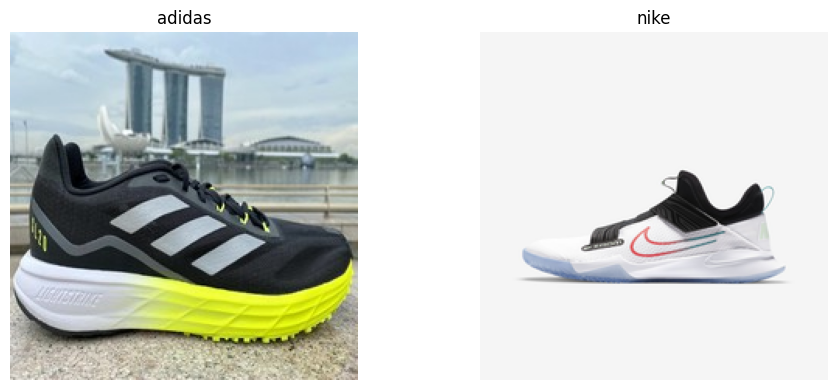

In [121]:
    # Creando una figura y un conjunto de subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
ax1.imshow(estado_0[1].numpy().astype("uint8"))
ax1.axis("off")
ax1.set_title("adidas")
ax2.imshow(estado_1[4].numpy().astype("uint8"))
ax2.axis("off")
ax2.set_title("nike")
# Ajustar el diseño
plt.tight_layout()

In [122]:
def preprocesamiento_imagen(imagen_arreglo):
    img_array = imagen_arreglo/255 # Estandarizando la imagen
    img_array = np.expand_dims(imagen_arreglo, axis=0)  # adicionando la dimensión del lote
    return img_array

###
Predecir si es una imagen es adidas o nike

In [123]:
img_array_0 = preprocesamiento_imagen(estado_0[0])
modelo.predict(img_array_0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.06129869]], dtype=float32)

In [124]:
img_array_0_1 = preprocesamiento_imagen(estado_0[1]) #cambiar el [1], varia la imagen a tomar del data set, se debe cambiar en la parte de crear las figuras.
modelo.predict(img_array_0_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


array([[0.00055283]], dtype=float32)

In [118]:
img_array_1 = preprocesamiento_imagen(estado_1[4])
modelo.predict(img_array_1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


array([[0.94557315]], dtype=float32)

### Creando front end

In [3]:
#utilizano la libreria  streamlit
import streamlit as st
from PIL import Image
import tensorflow as tf
import numpy as np

# Configuración de la página
st.set_page_config(layout="wide", page_title="Adidas vs Nike Predictor")

st.write("## Adidas vs Nike Image Classifier")
st.write(
    "Carga una imagen y nuestro modelo predirá si la imagen corresponde a Adidas o Nike. "
)

# Cargar el modelo (asegúrate de que esté en el mismo directorio o especifica la ruta correcta)
model = tf.keras.models.load_model('cnn_modelo_adidas_nike.keras')# Cambia esto por la ruta correcta

# Función para hacer predicciones
def predict_image(image):
    image = image.resize((224, 224))  # Ajusta al tamaño que tu modelo espera
    image = np.array(image)
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return prediction

# Cargar imagen desde la interfaz
uploaded_file = st.sidebar.file_uploader("Sube una imagen", type=["png", "jpg", "jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Imagen subida', use_column_width=True)
    
    # Hacer predicción
    prediction = predict_image(image)
    
    # Mostrar resultados
    if prediction[0][0] > 0.5:
        st.write("### Predicción: **Nike**")
    else:
        st.write("### Predicción: **Adidas**")


2024-08-29 19:23:28.088 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.118 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.122 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-08-29 19:23:28.126 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar